In [211]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from  plotnine import *
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [212]:
# Importing Dataset
sample = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")

sample.head()

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [213]:
sample.shape

(9994, 13)

In [214]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [215]:
sample.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [216]:
sample.duplicated().sum()

17

In [217]:
sample.drop_duplicates(inplace=True)

In [218]:
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [219]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [220]:
#Deleting postal code and country
col=['Postal Code','Country']
sample1=sample.drop(columns=col, axis=1)

In [221]:
#Finding Correlation Between Variales
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [222]:
#Finding Covariance Of Columns
sample1.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# DATA VISUALIZATION

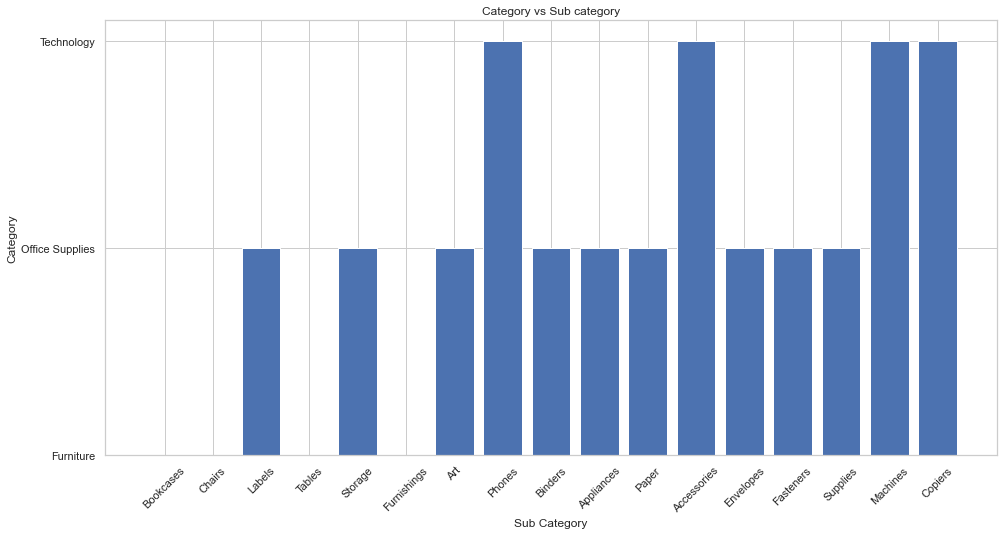

In [223]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=sample1)
plt.title('Category vs Sub category')
plt.xlabel('Sub Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

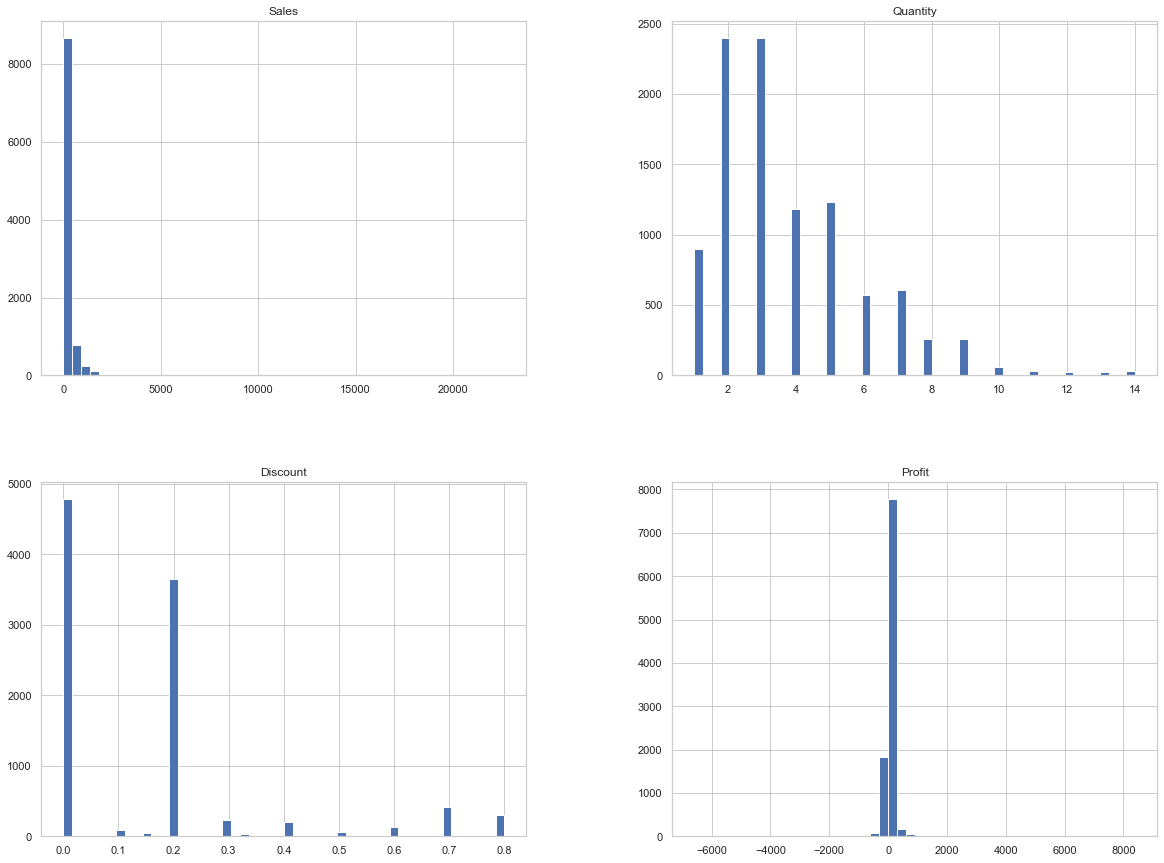

In [224]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

In [225]:
#count the total repeatable States
data1['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

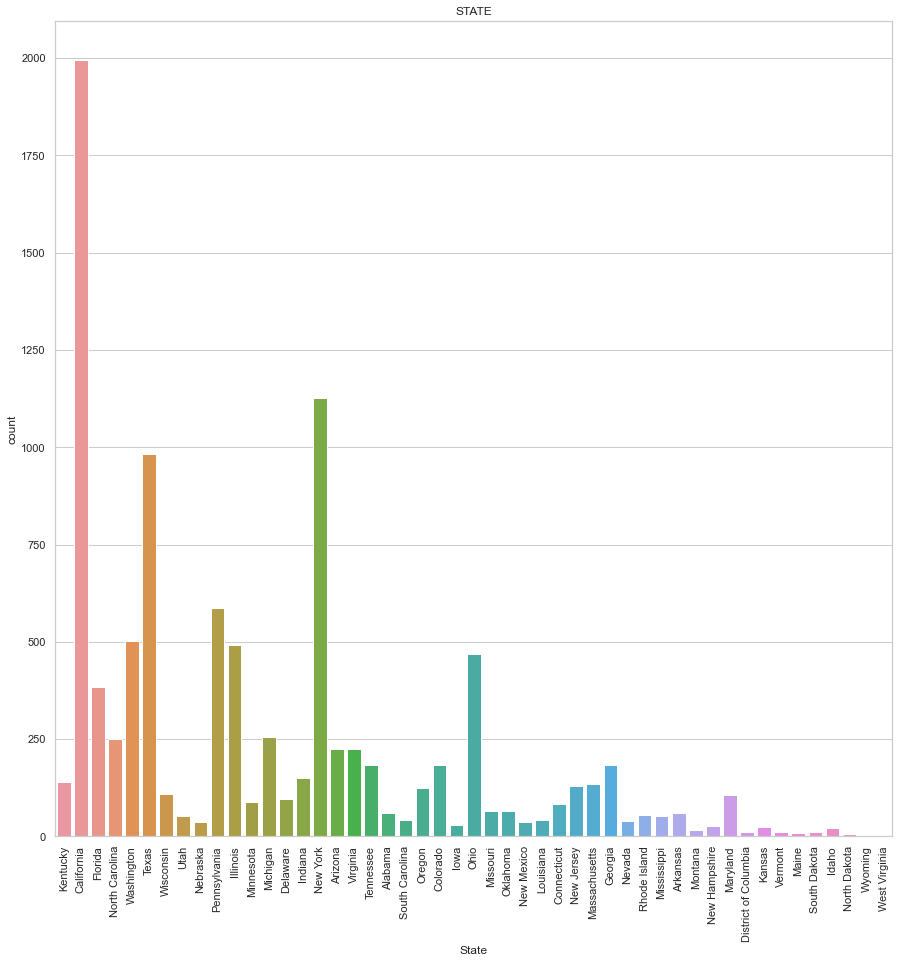

In [226]:
plt.figure(figsize=(15,15))
sns.countplot(x=sample1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

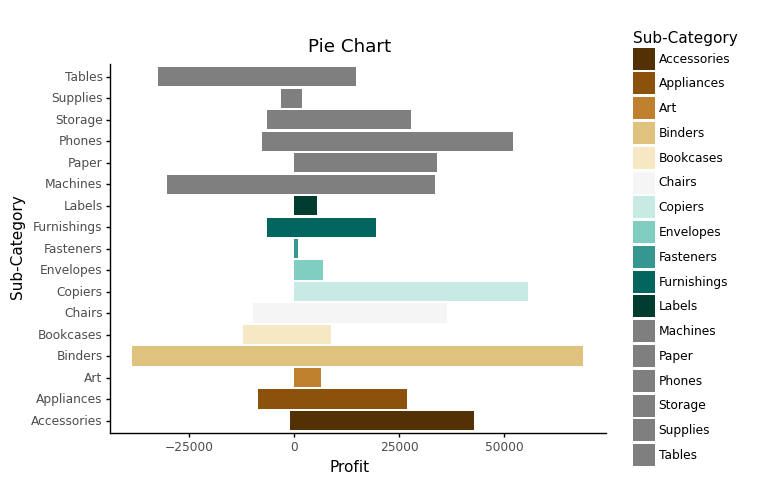

<ggplot: (57250844)>

In [227]:
profit_plot=(ggplot(sample1,aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip() + 
     scale_fill_brewer(type='div', pallete='Spectral') + theme_classic() + ggtitle('Pie Chart'))
display(profit_plot)

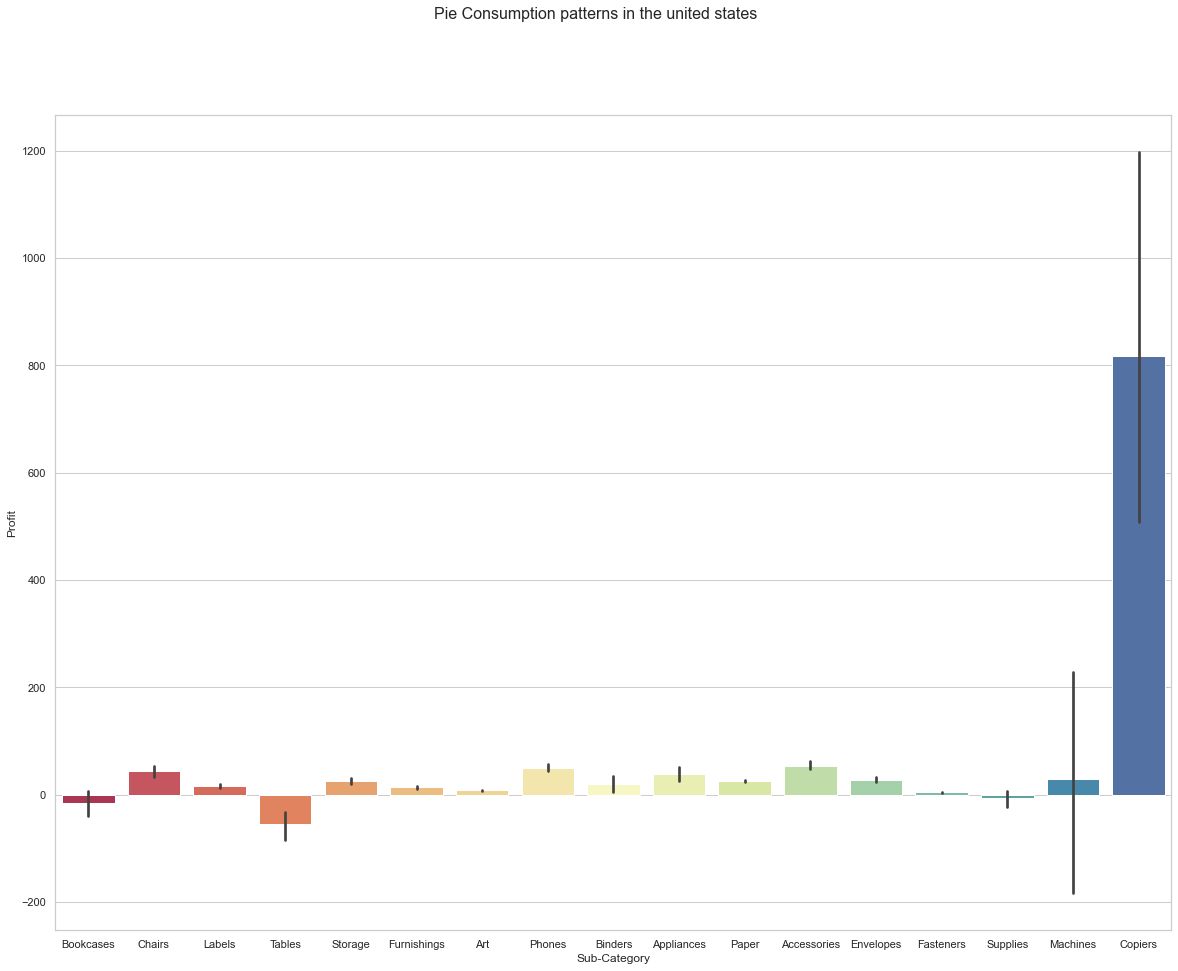

In [228]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x='Sub-Category', y='Profit', data=sample, palette='Spectral')
plt.suptitle('Pie Consumption patterns in the united states', fontsize=16)
plt.show()     

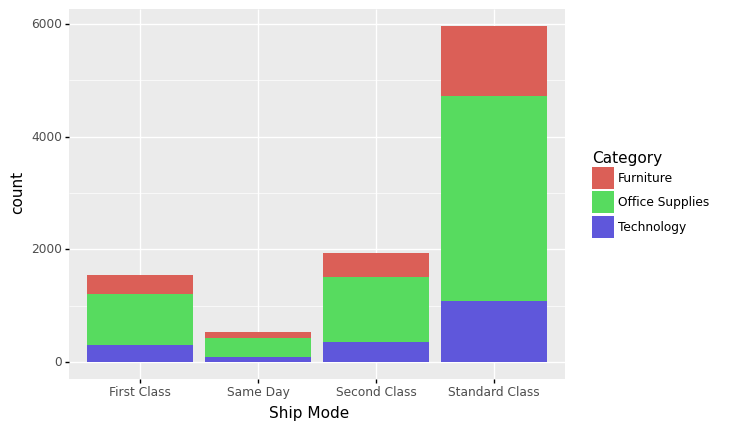

<ggplot: (56204541)>

In [229]:
ggplot(sample, aes(x='Ship Mode', fill='Category')) + geom_bar(stat= 'count')

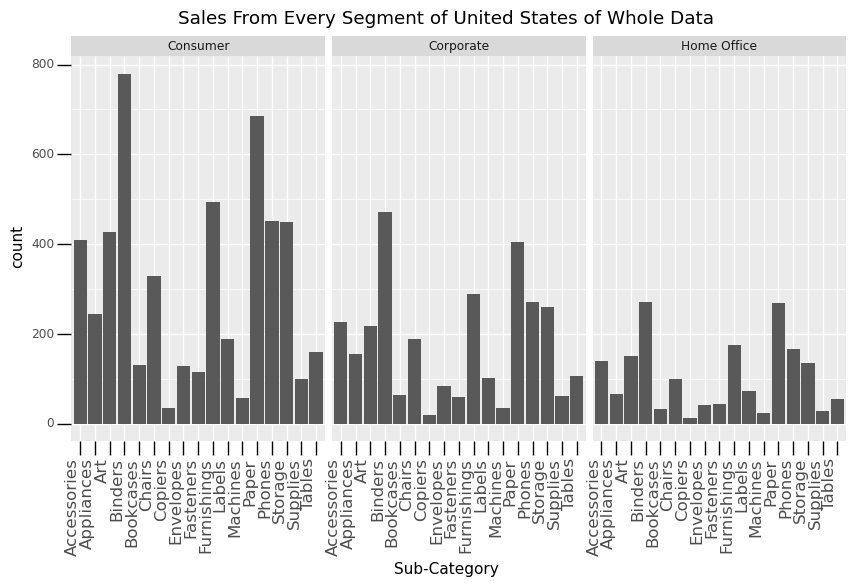

<ggplot: (56425129)>

In [230]:
flip_xlabels = theme(axis_text_x =element_text(angle=90 , hjust=1), figure_size=(10,5), axis_ticks_length_major=10,
axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) + flip_xlabels +
 theme(axis_text_x=element_text(size=12)) + ggtitle("Sales From Every Segment of United States of Whole Data"))


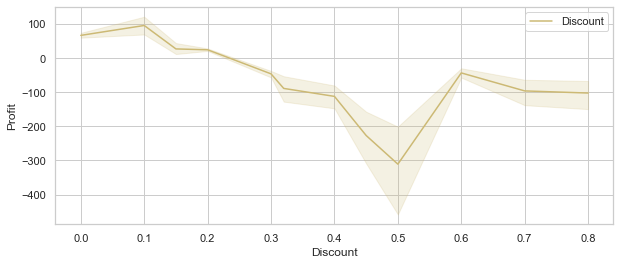

In [231]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount', 'Profit', data=sample1, color='y', label='Discount')
plt.legend()
plt.show()

In [232]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [233]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR',
              'California': 'CA','Colorado': 'CO','Connecticut': 'CT',
              'Delaware': 'DE','Florida': 'FL','Georgia': 'GA',
              'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
              'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
              'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
              'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
              'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
              'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
              'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND',
              'Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR',
              'Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC',
              'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX',
              'Utah': 'UT','Vermont': 'VT','Virginia': 'VA',
              'District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV',
              'Wisconsin': 'WI','Wyoming': 'WY'}
sample1['state_code'] = sample1.State.apply(lambda x: state_code[x])

In [234]:
state_data = sample1[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

In [235]:
def state_data_viewer(states):
    """plots the turnover generated by different product categories and sub-categories for the list of given states.
    Arg:
    states-List of all the states you want the plots for 
    Returns:
    None
    """
    product_data= sample1.groupby(["State"])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax =plt.subplots(1,3, figsize= (28,5))
        fig.suptitle(state, fontsize=14)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y=cat_data.index, ax=ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

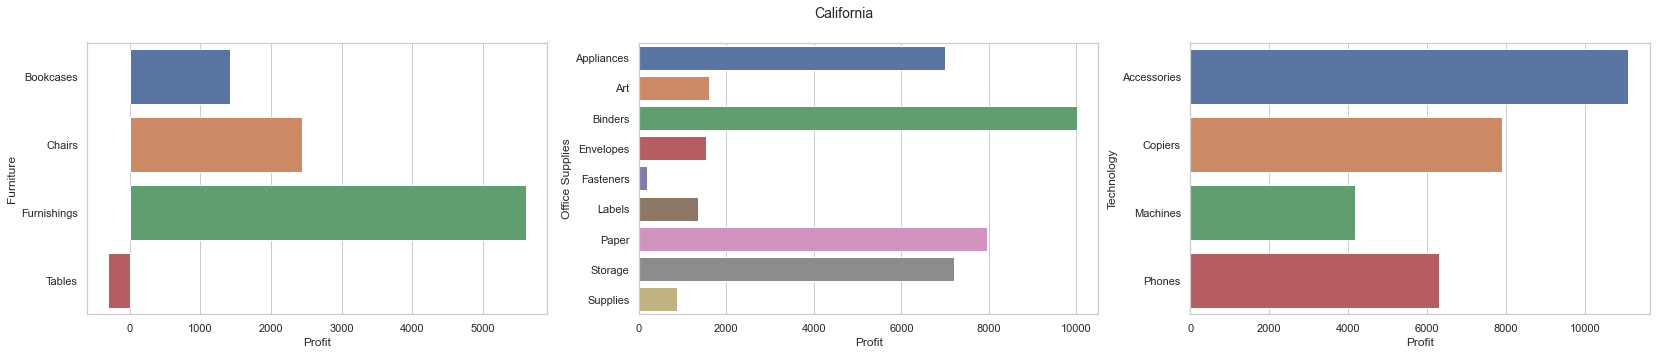

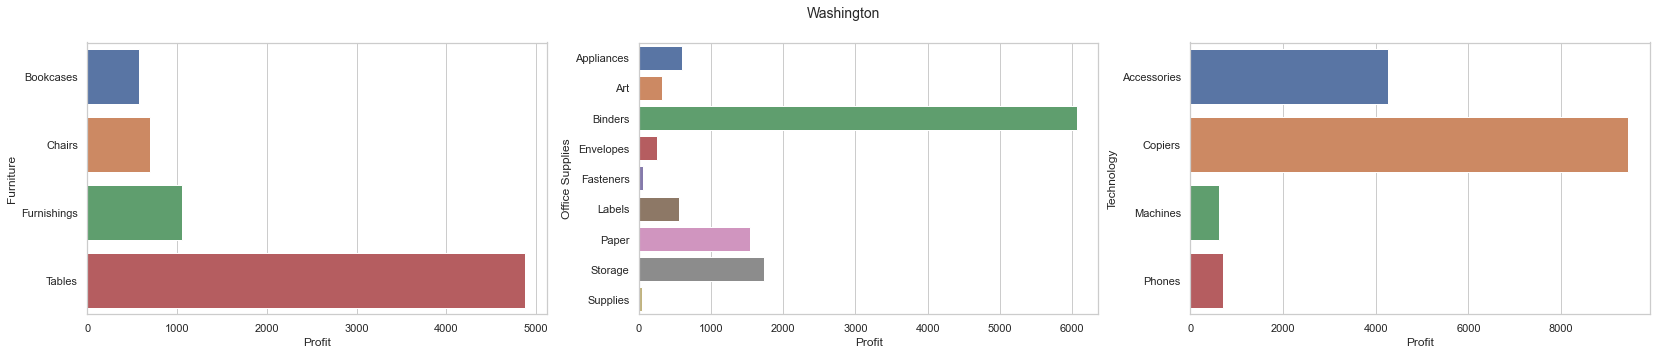

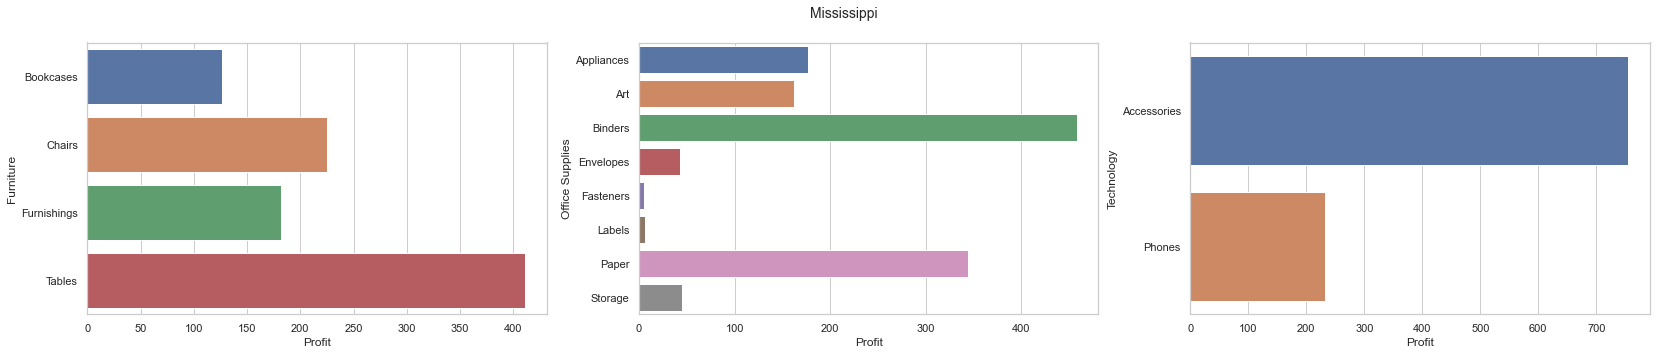

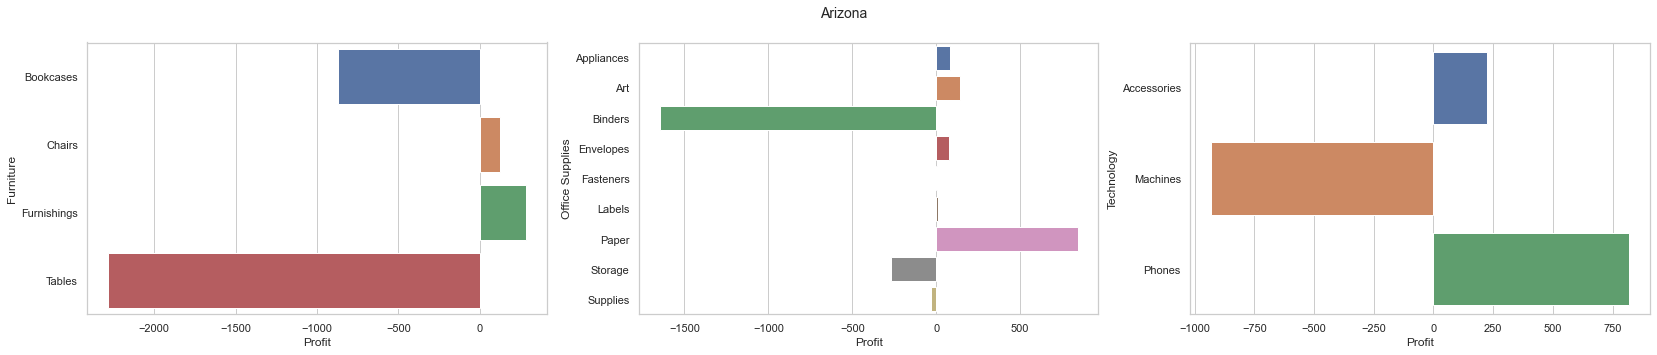

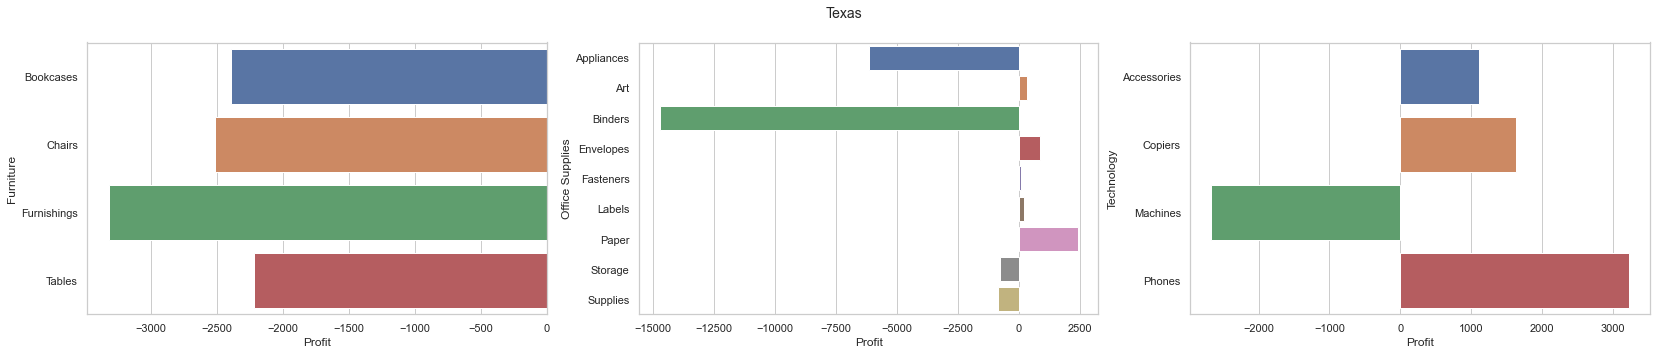

In [236]:
States=['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(States)

In [243]:
x=sample.iloc[:, [9,10,11,12]].values 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

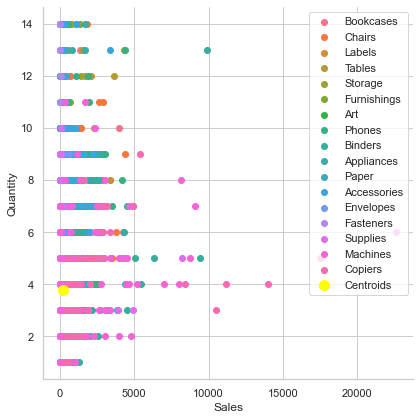

In [245]:
sns.set_style("whitegrid")
sns.FacetGrid(sample, hue='Sub-Category', height=6).map(plt.scatter, 'Sales', 'Quantity')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids' )
plt.legend()
plt.show()

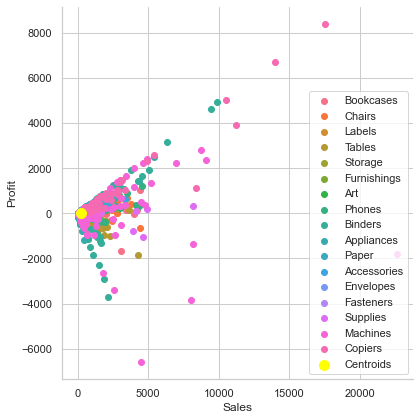

In [246]:
sns.set_style("whitegrid")
sns.FacetGrid(sample, hue='Sub-Category', height=6).map(plt.scatter, 'Sales', 'Profit')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids' )
plt.legend()
plt.show()

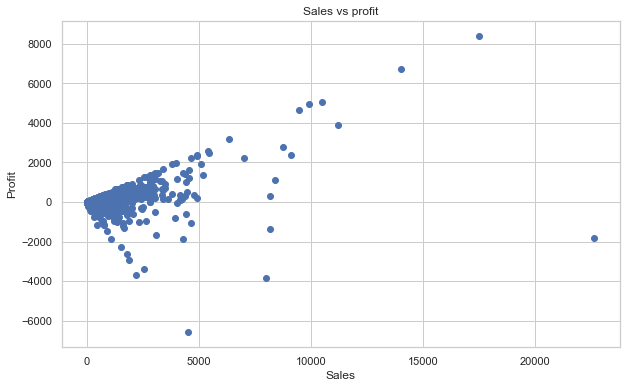

In [247]:
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(sample1['Sales'], sample1['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs profit')
plt.show()